# 인공 신경망

## 패션 MNIST

In [1]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


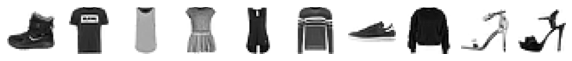

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [5]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


[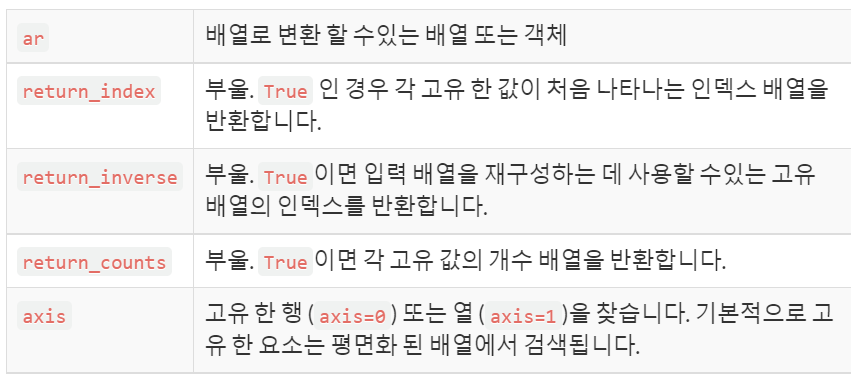](https://)

In [6]:
import numpy as np
#unique -> 평면화된 배열의 정렬된 고유값 반환 / 평면화:  주어진 배열을 1차원 배열로 변환하기 위해 모든 행을 차례로 배치하는 것을 의미
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 분류하기

#### 표준화

In [7]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [8]:
print(train_scaled.shape)

(60000, 784)


#### 교차검증, SGD(확률경사하강법)
SGD는 Stochastic Gradient Descent의 준말로 batch gradient descent와 대비되는 개념.

Stochastic Gradient Descent : 전체 data를 가지고 한번의 loss function을 계산하는게 아니라 batch단위로 loss function을 계산.

장점 :
1. 이로인해 loss function을 여러번 빨리 계산할 수 있다
2. local minima에 쉽게 빠지지 않는다. 즉, global minima를 찾을 확률이 높다.
 

반대로  BGD는 한번 loss를 계산할 때 마다 전체 data를 이용하여 계산하기 때문에 계산량이 많고 오래걸림.
(Batch Gradient Descent는 이름때문에 SGD와 개념이 헷갈릴 수 있지만 여기서 Batch는 데이터 전체 묶음을 의미함)

 

lossstr : 손실함수 (default='hinge')

penalty : {'l2', 'l1', 'elasticnet'}, default='l2'

alpha : 값이 클수록 강력한 정규화(규제) 설정 (default=0.0001)

l1_ratio : L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) (default=0.15)

fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default=True)

max_iter : 계산에 사용할 작업 수 (default=1000)

tol : 정밀도

shuffle : 에포크 후에 트레이닝 데이터를 섞는 유무 (default=True)

epsilon : 손실 함수에서의 엡실론, 엡실론이 작은 경우, 현재 예측과 올바른 레이블 간의 차이가 임계 값보다 작으면 무시 (default=0.1)

n_jobs : 병렬 처리 할 때 사용되는 CPU 코어 수

random_state : 난수 seed 설정

learning_rate : 학습속도 (default='optimal')

eta0 : 초기 학습속도 (default=0.0)

power_t : 역 스케일링 학습률 (default=0.5)

early_stopping : 유효성 검사 점수가 향상되지 않을 때 조기 중지여부 (default=False)

validation_fraction : 조기 중지를위한 검증 세트로 설정할 교육 데이터의 비율 (default=0.1)

n_iter_no_change : 조기중지 전 반복횟수 (default=5)

class_weight : 클래스와 관련된 가중치 {class_label: weight} or “balanced”, default=None

warm_start : 초기화 유무 (default=False)

average : True로 설정하면 모든 업데이트에 대한 평균 SGD 가중치를 계산하고 결과를 coef_속성에 저장 (default=False)

다중 분류 -> 손실함수가 log? cross-entropy가 아니라?
SGD -> cross entropy가 없음. 10개 클래스 다중분류 -> 10개의 이중분류
ex) 부츠 - positive, 나머지 - negative
10개의 함수(식) -> 10개의 z값 -> softmax로 확률값으로 바꿈

=> SGD는 이중분류이든 다중분류이든 log함수를 손실함수로 쓴다!

n_jobs=-1로 지정하면 컴퓨터의 모든 코어를 사용한다.

[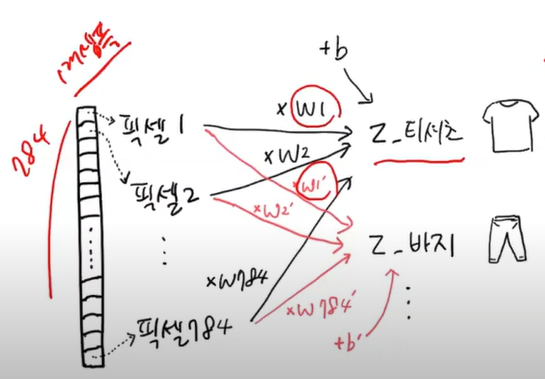](https://)

In [9]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8195666666666668


### 손실함수 - log함수
확률 값을 음의 log함수에 넣어 변환을 시킨 값으로 평가하는데, 이는 잘못 예측할 수록, 패널티를 부여하기 위함이다.

예로, 100%의 확률(확신)로 답을 구한 경우 log loss는 -log(1.0) = 0이다. 80% 확률의 경우에는, -log(0.8) = 0.22314이다. 60% 확률의 경우에는, -log(0.6) = 0.51082이다.

확률이 낮아질 수록 log loss 값이 기하급수적으로 증가하는 것을 볼 수 있다. 이런식으로 log loss는 확률이 낮을 때 패널티를 더 많이 부여하기 위해 음의 로그 함수를 사용한다

## 인공신경망

### 텐서플로와 케라스

In [10]:
import tensorflow as tf

In [11]:
from tensorflow import keras

## 인공신경망으로 모델 만들기

[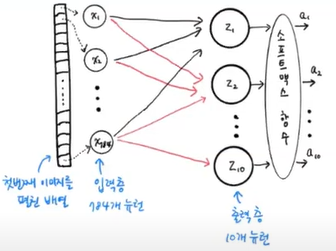](https://)

In [12]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [13]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [14]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


### dense = 밀집층, 완전 연결층 (fully connected layer)
=> 10개의 뉴런 = class 개수만큼

cf ) 이진분류 => sigmoid

In [15]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

#### sequential -> 층을 차례로 쌓은 것을 모델에 넣기

In [16]:
model = keras.Sequential(dense)

## 인공신경망으로 패션 아이템 분류하기

### compile = 설정

### sparse_categorical_crossentropy
=> 각 샘플이 오직 하나의 class에 속할 때 사용하고
### categorical_crossentropy
=> 각 샘플이 여러 개의 class에 속할 수 있거나 label이 soft probability일 때 좋음. (e.g. [0.5, 0.3, 0.2])

In [17]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [18]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


### train 데이터로 모델 학습하기

In [19]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 8s 4ms/step - loss: 0.6075 - accuracy: 0.7928
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4776 - accuracy: 0.8398
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4572 - accuracy: 0.8476
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4447 - accuracy: 0.8523
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4368 - accuracy: 0.8555


#### validation 데이터로 모델 평가하기

In [20]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4497 - accuracy: 0.8478


[0.4497062861919403, 0.8477500081062317]

[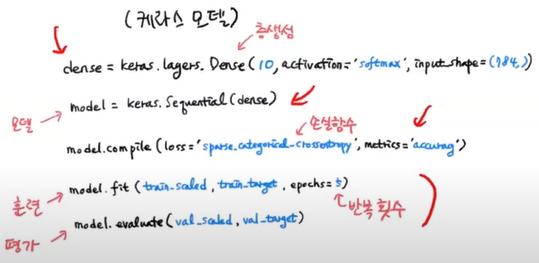](https://)